In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
path = "/content/drive/MyDrive/Colab Notebooks/midterm-assignment/"

#Problem3
We consider the dual of the support vector machine (L2-regularized hinge loss based binary classifier). The original optimization problem of this classification can be represented as
```
w^ =  argmin w∈Rd (sum max(0, 1 − yiw⊤xi) + λ||w||2)    (1)
```
where xi ∈ Rd, w ∈ Rd, yi ∈ {±1}, and λ > 0 denotes i-th input variable, the parameter vector,
and the label for i-th input data, and a coefficient of the regularization term, respectively.
1. Verify that the dual Lagrange function of this optimization can be written as
```
maximize α∈Rn −1/4l α⊤Kα + α⊤1     (2)
subjectto 0≤α≤1
```
where 1 and 0 denote a n dimensional vector whose elements are all 1 and 0, respectively, and K ∈ Rn×n denotes a symmetric square matrix, and its i-th row and j-th column element can be represented by yiyjx⊤i xj.

ここでは，サポート・ベクトル・マシンの双対（L2正則化ヒンジ・ロス・ベース・バイナリー・クラシフィアー）を考えます．この分類の元々の最適化問題は，次のように表すことができます．
```
w^ =  argmin w∈Rd (sum max(0, 1 − yiw⊤xi) + λ||w||2)    (1)
```
ここで，xi∈Rd，w∈Rd，yi∈{±1}，λ＞0はi番目の入力変数，パラメータベクトルを表す．
i番目の入力データのラベル，正則化項の係数をそれぞれ表す。
1. この最適化の双対ラグランジュ関数は次のように書けることを検証する。
```
maximize α∈Rn −1/4l α⊤Kα + α⊤1    (2)
subjectto 0≤α≤1
```
ここで、1と0はそれぞれ要素がすべて1と0であるn次元のベクトルを表し、K∈Rn×nは対称正方行列を表し、そのi行j列目の要素はyiyjxi⊤ xjで表すことができます。
2. 2.KKT条件より，αで与えられる最適な重みパラメータwが次のように書けることを確認する．
```
wˆ＝1/2λ sum aiyixi
```
3. 負の双対ラグランジュ関数の最小化を、投影勾配を用いて実施する（簡単のため）。妥当性については、双対ラグランジュ関数のスコア（(2)を使用）と、ヒンジ損失関数と正則化の和を、反復回数（(1)と(3)を使用）に応じてそれぞれ示す。双対性ギャップが0になると収束することを確認する。ここでは、投影勾配は単に
```
α(t) = P[0,1]n (α(t-1) - ηt(1/2λ Kα(t-1) - 1))
```
ここで、ηtはt番目の反復における学習率を表し、P[0,1]nは入力の各キャストを[0,1]に投影する投影演算子を表しています。

In [ ]:
d = 2
n = 10

w = np.random.rand(d)
x = 10*np.random.rand(n,d)
y = np.random.randint(0,2,n)

In [ ]:
K = np.empty((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = y[i]*y[j]*x[i].T@x[j]
a0 = np.random.rand(n)

In [ ]:
def J(a):
    return -1/4/l*a.T@K@a + a@np.ones(n)

def dJ(a):
    return -1/2/l*K@a + 1
    

def projected_gradient(a,h,l,e=1e-9):
    loop = 1
    as_ = [a]
    while 1:
        b_new = a + h(loop)*dJ(a)
        a_new = np.zeros(a.shape)
        for i in range(n):
            if b_new[i] < 0:
                a_new[i] = 0
            elif b_new[i] > 1:
                a_new[i] = 1
            else:
                a_new[i] = b_new[i]
        print("\rloop:",loop,"e:",abs(J(a)-J(a_new)),end="")
        if abs(J(a)-J(a_new)) < e:
            print()
            break
        a = a_new
        as_.append(a)
        loop += 1
    return a,as_,loop

In [ ]:
def h(loop):
    return .001
l = 1

a_hat,as_,loop = projected_gradient(a0,h,l)
#as_

loop: 654 e: 9.88496395848415e-10


In [ ]:
w_hat = 1/2/l*sum([a_hat[i]*y[i]*x[i] for i in range(n)])
scores = []
for ai in as_:
    wi = 1/2/l*sum([ai[i]*y[i]*x[i] for i in range(n)])
    scores.append(sum([max(0,1-y[k]*wi.T@x[k])+l*wi@wi.T for k in range(n)]))
w_hat

Jas_hat = []
for ai in as_:
    Jas_hat.append(J(ai))

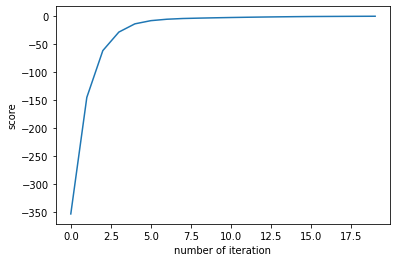

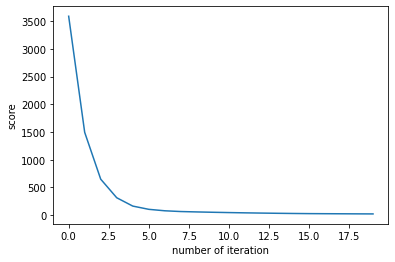

In [ ]:
plt.plot(range(20),Jas_hat[:20])
plt.xlabel("number of iteration")
plt.ylabel("score")
plt.savefig(path+"3-3-1.png")
plt.show()
plt.plot(range(20),scores[:20])
plt.xlabel("number of iteration")
plt.ylabel("score")
plt.savefig(path+"3-3-2.png")
plt.show()


In [ ]:
w0 = np.linspace(-5,15,100)
w1 = np.linspace(-5,15,100)
W0,W1 = np.meshgrid(w0,w1)
Z = np.empty(W0.shape)
for i in range(100):
    for j in range(100):
        w = np.array((w0[i],w1[j]))
        Z[i,j] = sum([max(0,1-y[k]*w.T@x[k])+l*w@w.T for k in range(n)])
#Z

In [ ]:
xs = []
ys = []
for ai in as_:
    xi,yi = 1/2/l*sum([ai[i]*y[i]*x[i] for i in range(n)])
    xs.append(xi)
    ys.append(yi)
    #print(xi,yi)

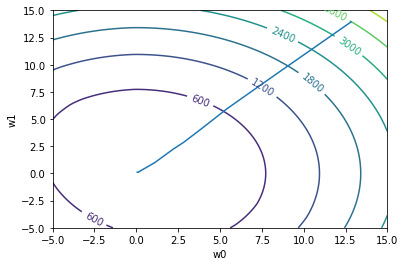

In [ ]:
cont = plt.contour(W0, W1, Z)
plt.plot(xs[:-10],ys[:-10])

cont.clabel(fmt="%d") 
plt.xlabel('w0')
plt.ylabel('w1')
plt.savefig(path+"3-3-3.png")
plt.show()